# On log and decimal places of them
#### By Jake Roggenbuck

In [2]:
from math import log
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
class Frame:
    def __init__(self, start=0, end=600, location=3):
        self.start = start
        self.end = end
        
        self.length = self.end - self.start
        self.location = location
        
        self.vector: list[int] = self.generate()
                
    def generate(self) -> list[int]:
        """This generates a vector
        
        It will find the log value for every value x start to end and every value y start to end.
        [
            [log(start, start + 0), log(start + 1, start + 0), ..., log(end - 1, start + 0)],
            [log(start, start + 1), log(start + 1, start + 1), ..., log(end - 1, start + 1)],
            [log(start, start + 2), log(start + 1, start + 2), ..., log(end - 1, start + 2)],
            ...,
            [log(start, end - 1),   log(start + 1, end - 1),   ..., log(end - 1, end - 1)  ],

        ]
        """
        vector = []

        # Go from start to end for both value x and y
        for x in range(self.start, self.end):
            for y in range(self.start, self.end):

                if y < 1:
                    # Look before you leap with all values base 0
                    vector.append(0)
                    continue
                    
                try:
                    # Get the log value
                    value = log(x, y)
                    # Split the number like "1.234" -> ["1", "234"] and take the latter
                    after = str(value).split(".")[1]
                    
                    # Take the value of the number at the location
                    # "234"[1] -> "3" as an int, int("3") -> 3
                    # Then add it to the matrix
                    vector.append(int(after[self.location]))
                    
                except:
                    # If the log fails, add a zero in it's place
                    vector.append(0)

        return vector
    
    def make_df(self):
        data = {
            # Create both axes x and base
            'x': np.tile([*range(self.start, self.end)], self.length),
            'base': np.repeat([*range(self.start, self.end)], self.length),
            # Take the values from the vector and make it into a dataframe
            'value': self.vector,
        }
        
        # Make the dataframe from the columns
        df = pd.DataFrame(data, columns=['x', 'base', 'value'])
        df = df.pivot('x', 'base', 'value')
        return df
    
    def plot(self):
        # Plot the dataframe
        sns.heatmap(self.make_df())
        plt.show()

### Example one
Notice here, the decimal places at location 0 (the first location) are as expected, you can see what look like bars that increase in width as both x and base increase. This makes sense because of how rational numbers are. They can be represented by ratios. if you have 1/6, 1/7, and 1/8, the numbers get smaller and smaller. Those in decimal are 0.167, 0.142, and 0.125 and you can notice that all of them start with 1 at position 0. This is true for division, but these images are aboit the log function. So how do decimal places relate to the x and the base?

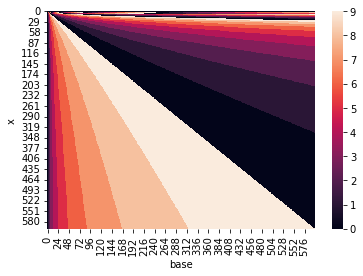

In [4]:
first = Frame(start=0, end=600, location=0)
first.plot()

### Example two
Consider the same numbers 0.167, 0.142, and 0.125 and look at what is in position 1. You can see 6, 4, and 2. They are related. As you continue to increase the values x and base, the numbers you see the same patterns you do in division, and rational numbers. The width of the groups get smaller but more numerus.

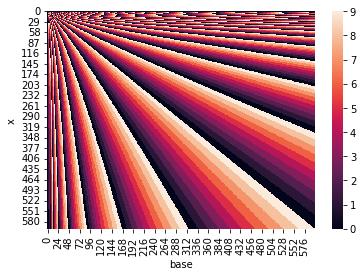

In [5]:
second = Frame(start=0, end=600, location=1)
second.plot()

### Example three
This shows a similar progression of thr groups getting more numerus but less in width. However, something else emerges, you can see what looks like chaos in some places and repetative patterns in others.

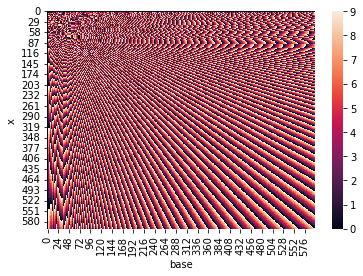

In [6]:
third = Frame(start=0, end=600, location=2)
third.plot()

### Example four
The groups completly disappear and new patterns form.  What look like hyperbola seem to appear.

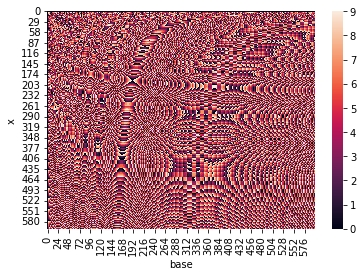

In [7]:
fourth = Frame(start=0, end=600, location=3)
fourth.plot()

### Example five
Here we see a totally different pattern.

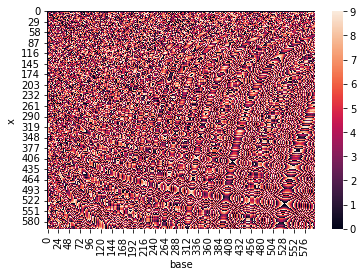

In [13]:
fifth = Frame(start=0, end=600, location=4)
fifth.plot()

Here is a larger version, going out to 4000. We are about reaching the limit these graphs can handle.

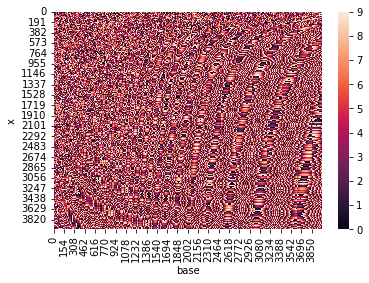

In [15]:
fifth = Frame(start=0, end=4000, location=4)
fifth.plot()

### More detail
Since we are about at the limit of what a graph can represent, we will generate an image pixel by pixel.


In [37]:
from PIL import Image
from IPython.display import display

class NewFrame(Frame):
    """A subclass of frame witha method to generate an image"""
    def image(self):
        array = self.make_df().to_numpy()

        w = h = self.length
        data = np.zeros((h, w, 3), dtype=np.uint8)

        for x, row in enumerate(array):
            for y, column in enumerate(array[x]):
                data[x, y] = (50, column * 20, 50) if column != np.nan else 0

        img = Image.fromarray(data, "RGB")
        display(img)

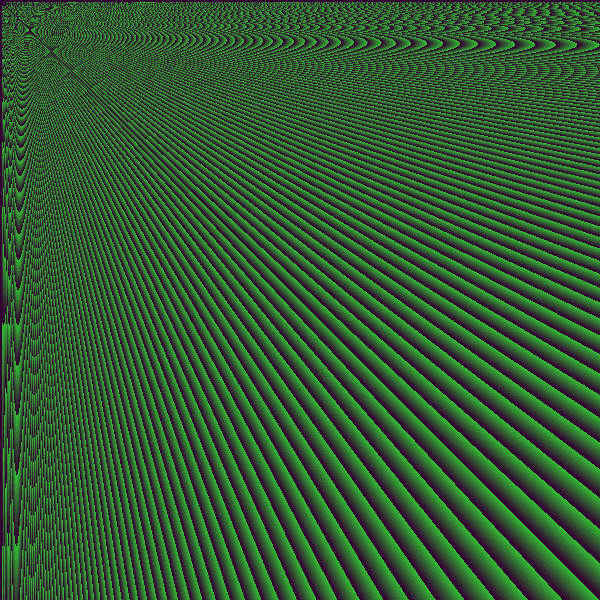

In [44]:
third = NewFrame(start=0, end=600, location=2)
third.image()

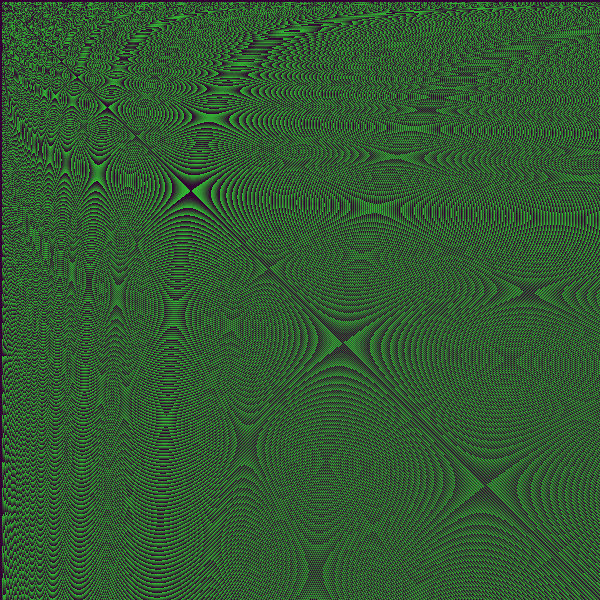

In [42]:
fourth = NewFrame(start=0, end=600, location=3)
fourth.image()

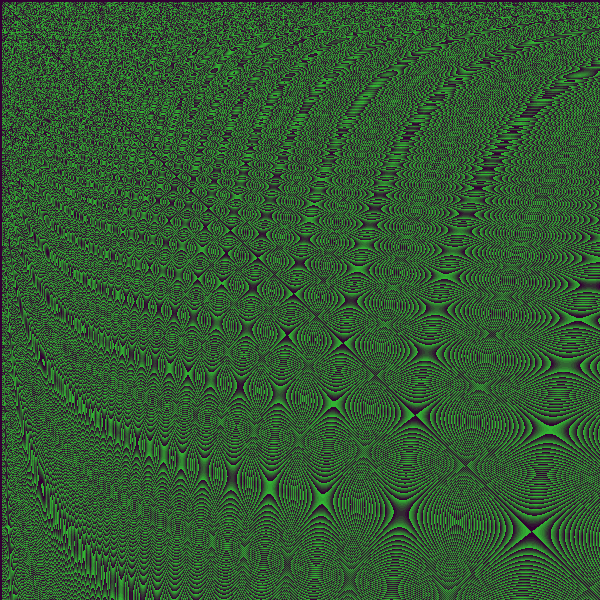

In [45]:
fifth = NewFrame(start=0, end=600, location=4)
fifth.image()

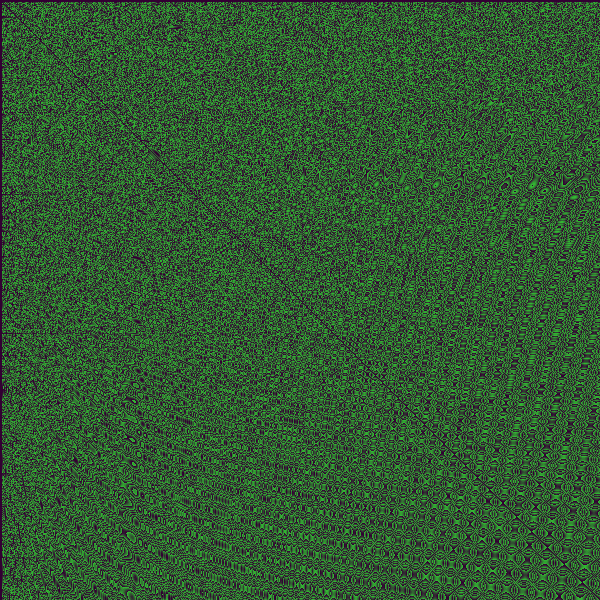

In [47]:
sixth = NewFrame(start=0, end=600, location=5)
sixth.image()

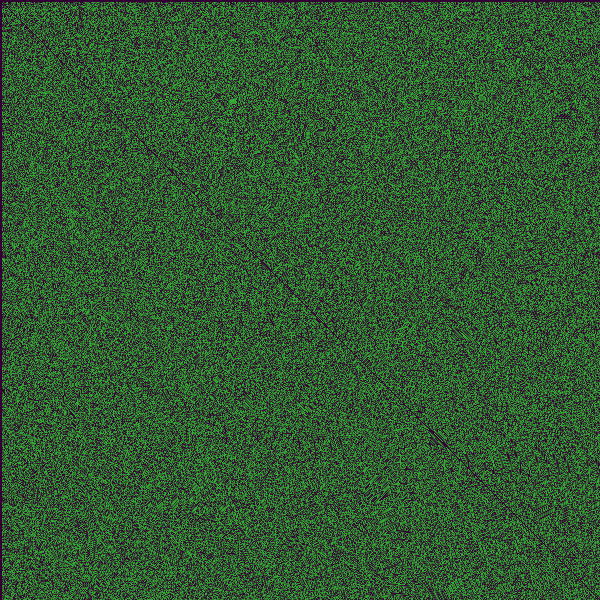

In [49]:
seventh = NewFrame(start=0, end=600, location=6)
seventh.image()

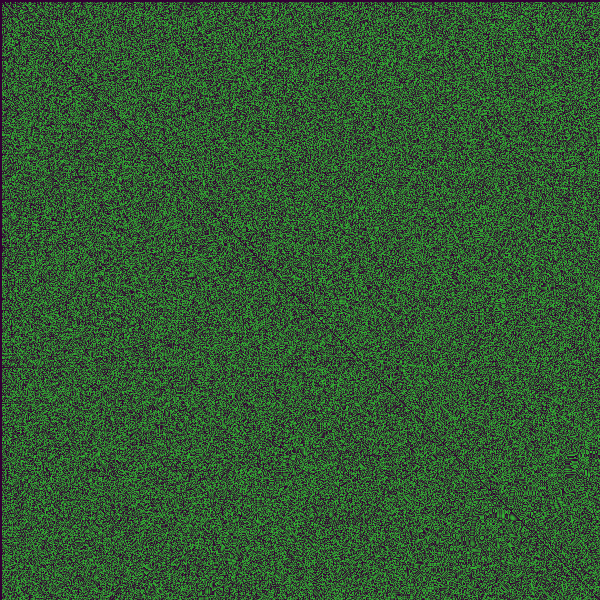

In [50]:
eighth = NewFrame(start=0, end=600, location=7)
eighth.image()

Notice how the top half is darker on average than the buttom half.

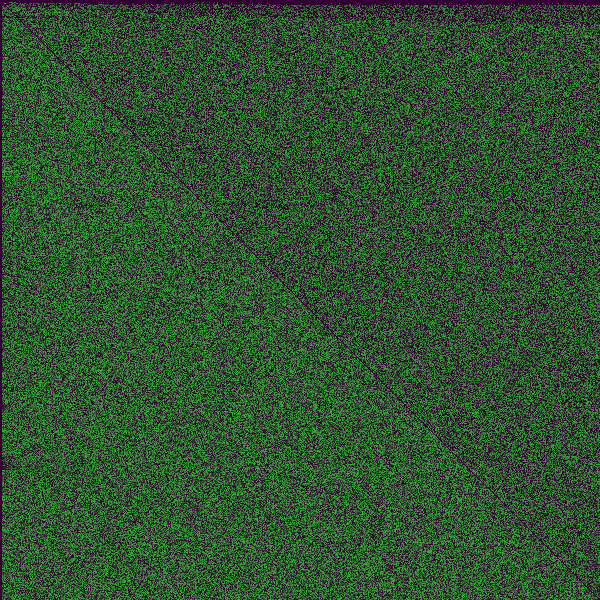

In [61]:
more = NewFrame(start=0, end=600, location=15)
more.image()